In [1]:
import pandas as pd
from datetime import datetime, date, time, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading in files

dfloc = pd.read_csv("final_output.csv")
dfdict = pd.read_csv("Dictionary.csv")
df = pd.read_csv("dfmonth.csv")


In [4]:
df

,Unnamed: 0,RIDE_ID,started_on,completed_on,start_location_long,start_location_lat,distance_travelled,end_location_lat,end_location_long,active_driver_id,...,rate_per_mile,rate_per_minute,time_fare,driving_time_to_rider,driver_id,car_id,make,model,year,start_date
0,1421903,1421903,2017-04-05 00:00:11+00:00,2017-04-05 00:21:31+00:00,-97.673,30.490,27991.0,30.259,-97.739,652327,...,2.60,0.35,7.47,719.0,685,685,b'Dodge',b'Durango',b'2013',2017-04-05
1,1421904,1421904,2017-04-05 00:01:23+00:00,2017-04-05 00:17:04+00:00,-97.676,30.329,11735.0,30.394,-97.754,652198,...,0.99,0.25,3.92,245.0,1212,1212,b'Ford',b'Taurus',b'2013',2017-04-05
2,1421905,1421905,2017-04-05 00:01:44+00:00,2017-04-05 00:09:16+00:00,-97.742,30.285,4194.0,30.271,-97.745,652252,...,2.60,0.35,2.64,296.0,2333,2333,b'Nissan',b'Pathfinder',b'2011',2017-04-05
3,1421906,1421906,2017-04-05 00:01:46+00:00,2017-04-05 00:10:53+00:00,-97.754,30.393,3944.0,30.394,-97.727,651463,...,0.99,0.25,2.28,251.0,4575,4575,b'Ford',b'Fusion',b'2013',2017-04-05
4,1421907,1421907,2017-04-05 00:01:47+00:00,2017-04-05 00:07:12+00:00,-97.752,30.395,2991.0,30.392,-97.765,652328,...,0.99,0.25,1.35,349.0,4746,4746,b'BMW',b'3 Series',b'2011',2017-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,1427500,1427500,2017-04-05 23:59:30+00:00,2017-04-06 00:20:51+00:00,-97.726,30.395,21730.0,30.267,-97.742,655244,...,0.99,0.25,5.34,180.0,3042,3042,b'Volvo',b'XC90',b'2004',2017-04-05
5598,1427501,1427501,2017-04-05 23:59:31+00:00,2017-04-06 00:10:04+00:00,-97.765,30.256,3562.0,30.268,-97.745,655024,...,0.99,0.25,2.64,229.0,1922,1922,b'Hyundai',b'Santa Fe',b'2011',2017-04-05
5599,1427502,1427502,2017-04-05 23:59:37+00:00,2017-04-06 00:09:10+00:00,-97.762,30.275,4886.0,30.260,-97.739,655101,...,0.99,0.25,2.39,237.0,4766,4766,b'Chevrolet',b'Tahoe',b'2005',2017-04-05
5600,1427503,1427503,2017-04-05 23:59:42+00:00,2017-04-06 00:12:43+00:00,-97.740,30.328,9602.0,30.270,-97.751,655245,...,0.99,0.25,3.26,147.0,2140,2140,b'Volkswagen',b'Jetta',b'2010',2017-04-05


In [3]:
dfdict.head()

,Unnamed: 0,DriverID,Location,Cluster,Time[Increments of 15]
0,0,685,30.259 -97.73899999999999,8,1
1,1,685,30.267 -97.755,8,15
2,2,685,30.214000000000002 -97.751,1,22
3,3,1432,30.254 -97.77600000000001,1,5
4,4,1432,30.209 -97.81,12,52


In [4]:
dfloc.head()

,Unnamed: 0,DriverID,RideID,Location,Time,Date
0,0,685,1421903,30.259 -97.73899999999999,00:21:31,2017-04-05
1,1,685,1422993,30.267 -97.755,03:55:30,2017-04-05
2,2,685,1423295,30.214000000000002 -97.751,05:36:30,2017-04-05
3,3,1432,1422285,30.254 -97.77600000000001,01:26:54,2017-04-05
4,4,1432,1424110,30.209 -97.81,13:11:38,2017-04-05


In [7]:
df['total_fare']

0       58.27
1       14.79
2       14.56
3        8.29
4        6.76
        ...  
5597    22.43
5598     8.41
5599     8.99
5600    12.80
5601    15.52
Name: total_fare, Length: 5602, dtype: float64

In [3]:
# data structure and array
class rate:
     def __init__(self,node,time,priceperminute):
            self.node = node
            self.time = time
            self.priceperminute = priceperminute
            
# array holding struct
ratelist = []
            

In [6]:
df.iloc[0]['total_fare']

58.27

In [4]:
# process

for x in range(len(dfdict)):
    
    # grabbing data
    rideID = dfloc.iloc[x]['RideID']
    
    cluster = dfdict.iloc[x]['Cluster']
    
    time = dfdict.iloc[x]['Time[Increments of 15]']
    
    # finding correct ride
    dftemp = df.loc[(df['RIDE_ID'] == rideID)]
    
    # getting time and and total fare
    
    fare = dftemp.iloc[0]['total_fare']
    
    start = dftemp.iloc[0]['started_on']
    start,trash = start.split('+')
    start = start.replace("-", "/")
    start= datetime.strptime(start,"%Y/%m/%d %H:%M:%S")
    

    finish = dftemp.iloc[0]['completed_on']
    finish,trash = finish.split('+')
    finish = finish.replace("-", "/")
    finish= datetime.strptime(finish,"%Y/%m/%d %H:%M:%S")
    
    difference = finish - start
    
    seconds = difference.total_seconds()
    
    price = fare/seconds
    price = price * 60
    
    
    ratelist.append( rate(cluster,time,price))
    print(rideID)
    print(seconds)
    print(fare)
    print(price)
    print('\n')

1421903
1280.0
58.27
2.73140625


1422993
1176.0
19.94
1.0173469387755103


1423295
2682.0
35.82
0.8013422818791947


1422285
710.0
11.7
0.9887323943661971


1424110
1399.0
16.11
0.6909220872051465


1425268
1105.0
20.6
1.118552036199095


1421931
529.0
9.16
1.0389413988657845


1422168
907.0
15.18
1.0041896361631752


1422462
263.0
6.06
1.382509505703422


1422830
382.0
7.06
1.1089005235602094


1422915
469.0
7.59
0.9710021321961619


1425644
787.0
10.04
0.7654383735705209


1421935
456.0
7.91
1.0407894736842105


1422307
543.0
7.84
0.8662983425414365


1422470
294.0
6.06
1.2367346938775508


1422889
494.0
7.69
0.934008097165992


1424867
244.0
6.06
1.4901639344262294


1424975
556.0
11.04
1.19136690647482


1425351
494.0
8.91
1.0821862348178137


1426024
1024.0
21.96
1.2867187500000001


1426357
565.0
7.48
0.7943362831858408


1426482
306.0
6.06
1.188235294117647


1426563
356.0
6.58
1.1089887640449438


1426653
270.0
6.06
1.3466666666666667


1426753
954.0
9.42
0.5924528301886792




7.72
0.9245508982035927


1423549
855.0
17.76
1.2463157894736845


1425502
557.0
9.09
0.9791741472172351


1422489
512.0
7.69
0.9011718750000001


1423467
1487.0
17.15
0.6919973100201748


1422500
1504.0
28.41
1.133377659574468


1422668
348.0
6.06
1.0448275862068965


1422832
1299.0
14.5
0.6697459584295612


1423353
313.0
6.06
1.161661341853035


1423390
308.0
6.06
1.1805194805194805


1424928
1023.0
18.85
1.1055718475073315


1425054
656.0
9.82
0.8981707317073171


1425137
605.0
9.4
0.9322314049586777


1423058
502.0
7.52
0.898804780876494


1422526
888.0
15.82
1.068918918918919


1423088
1213.0
18.22
0.9012366034624897


1423333
1075.0
21.64
1.207813953488372


1426789
2515.0
25.73
0.6138369781312127


1422530
1084.0
18.55
1.0267527675276753


1422949
2179.0
64.01
1.762551629187701


1422544
1760.0
30.26
1.0315909090909092


1423097
467.0
7.4
0.9507494646680943


1422547
916.0
19.24
1.2602620087336245


1423120
926.0
14.73
0.9544276457883369


1423474
337.0
6.84
1.2178041543026707



1425941
3179.0
42.19
0.796288140924819


1425987
696.0
12.67
1.0922413793103447


1426182
1387.0
20.25
0.8759913482335977


1426623
4339.0
69.81
0.9653376353998617




In [6]:
# convert to dataframe and output


clusterlist = []
timelist = []
pricelist = []


for obj in ratelist:
    clusterlist.append(obj.node)
    timelist.append(obj.time)
    pricelist.append(obj.priceperminute)

pricedf = pd.DataFrame(list(zip(clusterlist,timelist,pricelist)), columns =['Node','Time', 'PricePerMinute'])

pricedf.to_csv('price_data.csv')

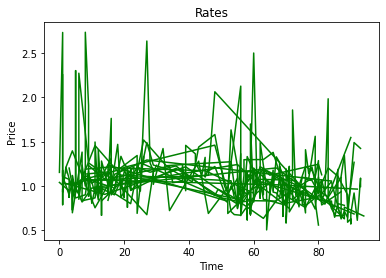

In [7]:
# create graph

plt.title("Rates")
plt.xlabel("Time")
plt.ylabel("Price")


nodes = max(clusterlist)
nodes = int(nodes)

for x in range(nodes + 1):
    dfholder = pricedf.loc[(pricedf['Node'] == x)]
    dfholder = dfholder.sort_values(by = 'Time')
    dfholder = dfholder[dfholder.PricePerMinute < 4]
    
    timelist = dfholder["Time"].values.tolist()
    pricelist = dfholder["PricePerMinute"].values.tolist()
    
    timelist = np.asarray(timelist)
    pricelist = np.asarray(pricelist)
    
    plt.plot(timelist, pricelist, color ="green")

plt.show()
    
